In [2]:
# LIBARIES
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 


In [3]:
df = pd.read_csv('Cleaned_Sales_Transaction.csv')
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,4,12472.0,Germany


In [4]:
# convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion 
print(df['Date'].head())

0   2019-12-09
1   2019-12-09
2   2019-12-09
3   2019-12-09
4   2019-12-09
Name: Date, dtype: datetime64[ns]


In [8]:
from tabulate import tabulate
# Load the dataset
df = pd.read_csv('Cleaned_Sales_Transaction.csv')

# Create a new column: revenue
df['Revenue'] = df['Price'] * df['Quantity']

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates if any
df = df.dropna(subset=['Date'])

# Create a new column: Month
df['Month'] = df['Date'].dt.month

# Create a new column: Year
df['Year'] = df['Date'].dt.year

# Display the first few rows in tabulated format
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

+---+---------------+---------------------+-----------+-------------------------------------+-------+----------+------------+----------------+--------------------+-------+------+
|   | TransactionNo |        Date         | ProductNo |             ProductName             | Price | Quantity | CustomerNo |    Country     |      Revenue       | Month | Year |
+---+---------------+---------------------+-----------+-------------------------------------+-------+----------+------------+----------------+--------------------+-------+------+
| 0 |    581482     | 2019-12-09 00:00:00 |   22485   |    Set Of 2 Wooden Market Crates    | 21.47 |    12    |  17490.0   | United Kingdom |       257.64       |  12   | 2019 |
| 1 |    581475     | 2019-12-09 00:00:00 |   22596   | Christmas Star Wish List Chalkboard | 10.65 |    36    |  13069.0   | United Kingdom | 383.40000000000003 |  12   | 2019 |
| 2 |    581475     | 2019-12-09 00:00:00 |   23235   |      Storage Tin Vintage Leaf       | 11.53 |    

In [ ]:
SALES TRENDS OVER THE MONTHS

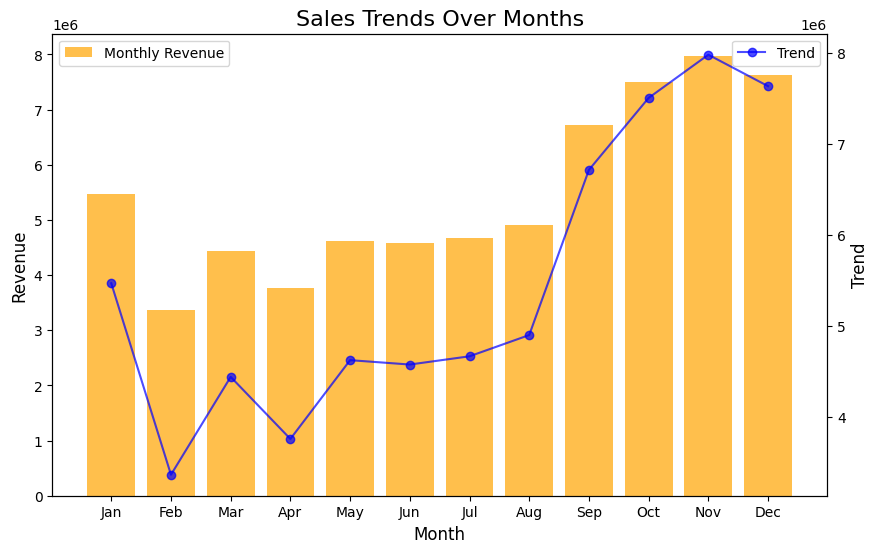

In [15]:
# Load the dataset
df = pd.read_csv('Cleaned_Sales_Transaction.csv')

# Create a new Column 
df['Revenue'] = df['Price'] * df['Quantity']

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#Drop rows with invalid dates if any
df = df.dropna(subset=['Date'])

# Create a new column: Month
df['Month'] = df['Date'].dt.month

#Create a new column: Year
df['Year'] = df['Date'].dt.year

# Group the data by month and calculate the sum of revenue for each month
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

# Plotting the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for revenue
ax1.bar(monthly_revenue['Month'], monthly_revenue['Revenue'], color='orange', alpha=0.7, label='Monthly Revenue')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Revenue', fontsize=12)
ax1.set_title('Sales Trends Over Months', fontsize=16)

# Add x-axis ticks for months
ax1.set_xticks(monthly_revenue['Month'])
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plotting the line chart on the same axis
ax2 = ax1.twinx()
ax2.plot(monthly_revenue['Month'], monthly_revenue['Revenue'], color='blue', marker='o', linestyle='-', alpha=0.7, label='Trend')
ax2.set_ylabel('Trend', fontsize=12)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the grid

In [ ]:
SALES TRENDS OVER THE MONTHS BY TOTAL QUANTITY SOLD

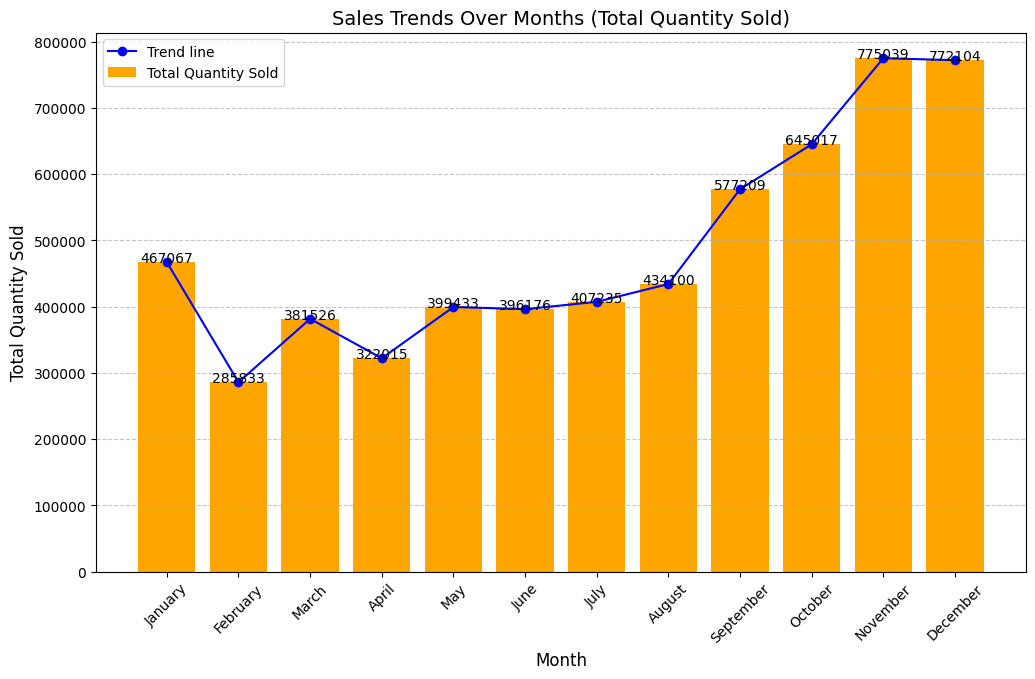

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

#reload the dataset
df = pd.read_csv('Cleaned_Sales_Transaction.csv')

# Ensure the 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the month from the 'Date' column 
df['Month'] = df['Date'].dt.month

# Group by 'Month' and calculate the sum of 'Quantity'
monthly_quantity = df.groupby('Month')['Quantity'].sum()

# Map month numbers to month names
monthly_quantity.index = [calendar.month_name[month] for month in monthly_quantity.index]

# Create the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(monthly_quantity.index, monthly_quantity.values, color='orange', label='Total Quantity Sold')

# Add the trend line (line chart)
plt.plot(monthly_quantity.index, monthly_quantity.values, color='blue', marker='o', label='Trend line')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.title('Sales Trends Over Months (Total Quantity Sold)', fontsize=14)

# Annonate Values on bars 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', fontsize=10, color='black')

# Add legend and gridlines 
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability 
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
10 transactions that give the highest total money

In [23]:
#load the cleaned dataset
df = pd.read_csv('Cleaned_Sales_Transaction.csv')

#ensure the date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column: Revenue
df['Revenue'] = df['Price'] * df['Quantity']

# Get the Top 10 Transactions
top_10_transactions = df.nlargest(10, 'Revenue')[['TransactionNo', 'ProductName', 'Revenue']]

# Print the result
print(top_10_transactions)



       TransactionNo                          ProductName     Revenue
142           581483            Paper Craft Little Birdie  1002718.10
473985        541431       Medium Ceramic Top Storage Jar   840113.80
475332       C541433       Medium Ceramic Top Storage Jar   840113.80
1616         C581484            Paper Craft Little Birdie   501359.05
533232       C536757  Rotating Silver Angels T-Light Hldr    96220.80
41367         578841       Asstd Design 3d Paper Stickers    77622.60
117790        573008    World War 2 Gliders Asstd Designs    50256.00
331834        554868                       Popcorn Holder    47257.00
438495        544612                Empire Design Rosette    43317.54
376379        550461   Fairy Cake Flannel Assorted Colour    38613.60


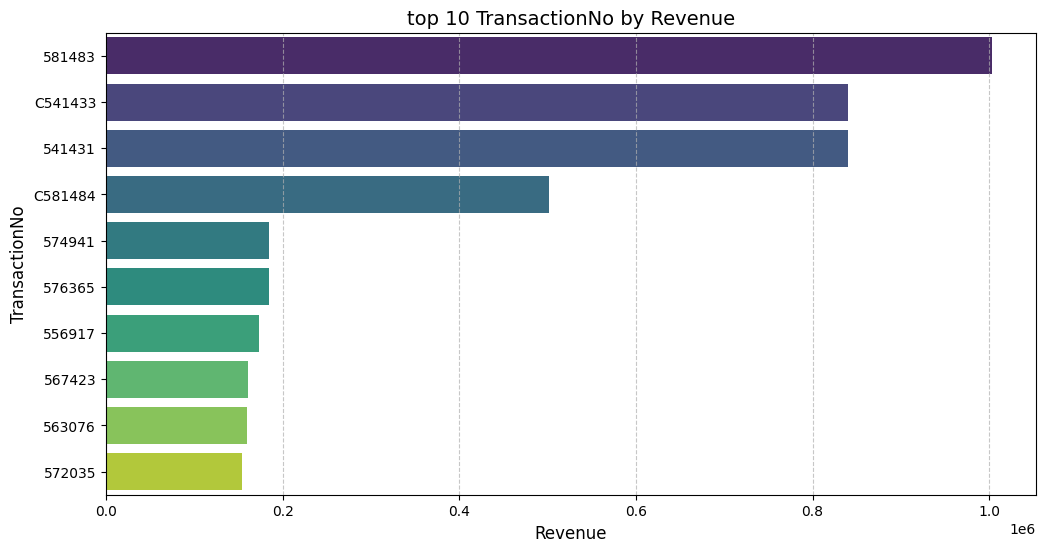

In [24]:
#load the cleaned dataset
df = pd.read_csv('Cleaned_Sales_Transaction.csv')

#Ensure the date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column : Revenue
df['Revenue'] = df['Price'] * df['Quantity']

# group by transaction number and sum of revenue 
transaction_revenue = df.groupby("TransactionNo")["Revenue"].sum().reset_index()

# sort transaction by tottal money 
transaction_revenue = transaction_revenue.sort_values(by="Revenue", ascending=False).head(10)

# plot the bar chart 
plt.figure(figsize=(12, 6))
sns.barplot(y="TransactionNo", x="Revenue", data=transaction_revenue, hue="TransactionNo", palette="viridis", legend=False)

# add labels and title
plt.ylabel("TransactionNo", fontsize=12)
plt.xlabel("Revenue", fontsize=12)
plt.title("top 10 TransactionNo by Revenue", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

#show the plot
plt.show()

In [ ]:
TOP 10 PRODUCTS THAT GENERATED THE HIGHEST REVENUE 

In [25]:
# Load cleaned dataset
df = pd.read_csv('Cleaned_Sales_Transaction.csv')

# Ensure date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create new column: Revenue
df['Revenue'] = df['Price'] * df['Quantity']

# Group by 'productNo' and sum of Revenue 
top_products = df.groupby(["ProductNo", "ProductName"])["Revenue"].sum().reset_index()

# Sort and get the top products
top_products = top_products.sort_values(by="Revenue", ascending=False).head(10)


#Print only Revenue, ProductNo, and product Name
print(top_products[["Revenue", "ProductNo", "ProductName"]])

         Revenue ProductNo                         ProductName
2008  1725268.14     23166      Medium Ceramic Top Storage Jar
2450  1504077.15     23843           Paper Craft Little Birdie
1097   591581.37     22197                      Popcorn Holder
2848   582300.35     84077   World War 2 Gliders Asstd Designs
3286   517783.68    85123A  Cream Hanging Heart T-Light Holder
3104   421893.78     84879       Assorted Colour Bird Ornament
427    394545.45     21212     Pack Of 72 Retrospot Cake Cases
1930   330265.57     23084                  Rabbit Night Light
1298   325679.10     22423            Regency Cakestand 3 Tier
3271   303935.56    85099B             Jumbo Bag Red Retrospot


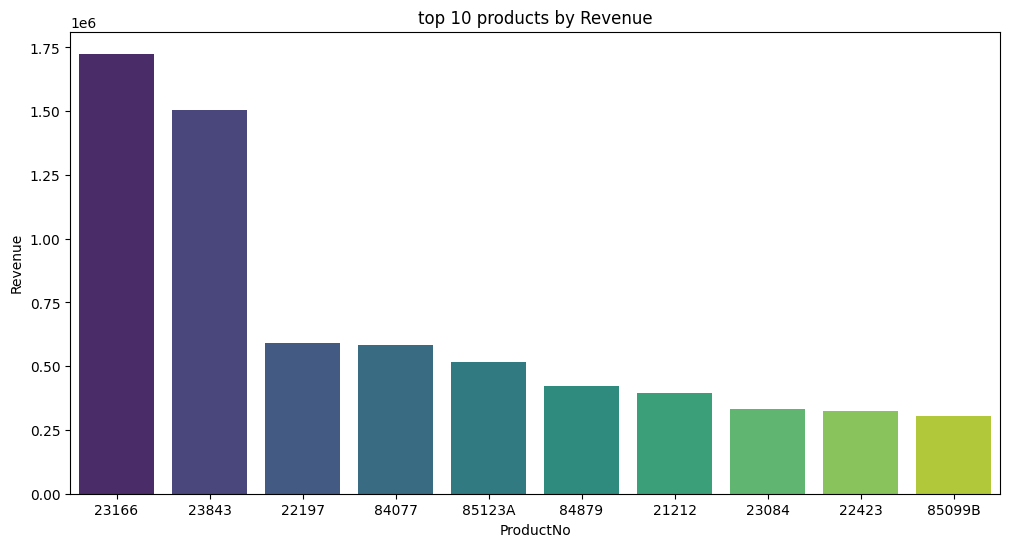

In [26]:
plt.figure(figsize=(12, 6))

sns.barplot(y="Revenue", x="ProductNo", data=top_products, hue="ProductNo", palette="viridis", legend=False)

plt.title("top 10 products by Revenue")
plt.xlabel("ProductNo")
plt.ylabel("Revenue")

plt.show()

In [ ]:
10 PRODUCTS GENERATING HIGHEST REVENUE BY AVAERAGE PRICE PER PIECE

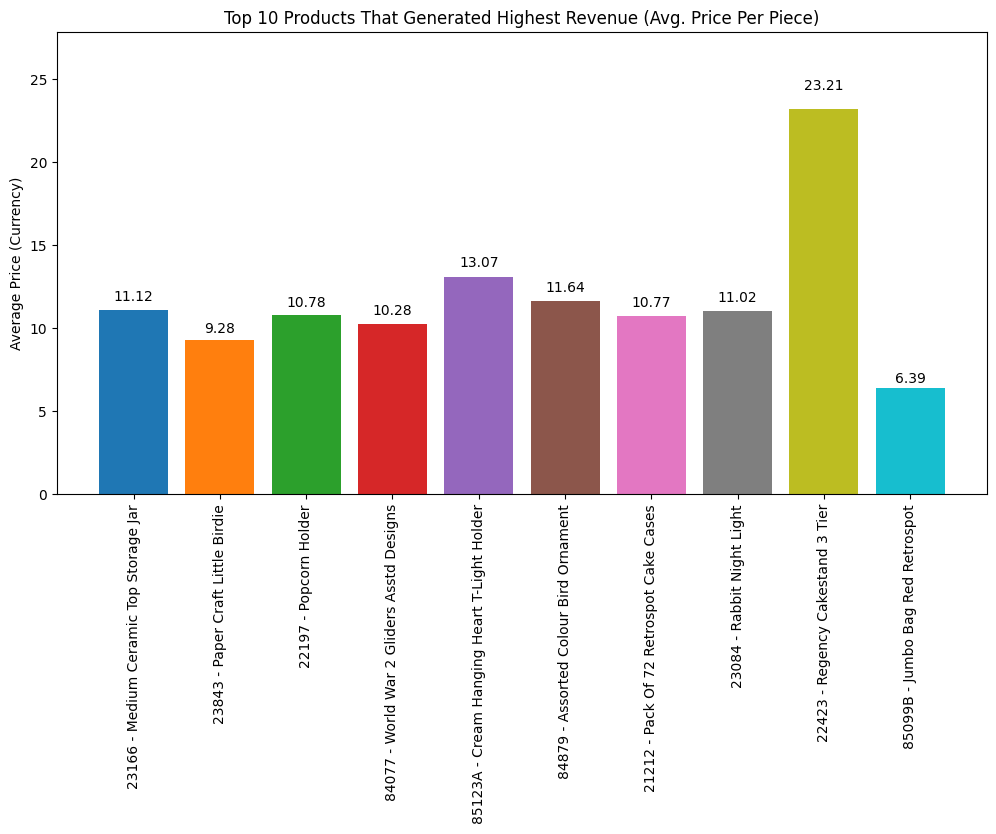

In [28]:
df = pd.read_csv('Cleaned_Sales_Transaction.csv')

# Create a new column:revenue
df['Revenue'] = df['Price'] * df['Quantity']

# group by ProductNo and ProductName to get revenue
df_product = df.groupby(['ProductNo', 'ProductName'])['Revenue'].sum().reset_index()

#Sort by revenue in descending order and get top 1o products
top_10_products = df_product.nlargest(10, 'Revenue')

# Extract productno and ProductName
listProductNo = top_10_products['ProductNo'].tolist()
listProductName = top_10_products['ProductName'].tolist()

#Calculate avaerage price per product
average_prices = [
    round(df['Price'][df['ProductNo'] == product_no].mean(), 2) for product_no in listProductNo
]

# Plot bar chart
plt.figure(figsize=(12, 6))
for i in range(len(listProductNo)):
    labelx = listProductNo[i] + ' - ' + listProductName[i]  # ProductNo - ProductName
    plt.bar(labelx, average_prices[i])  # Create bar
    plt.text(labelx, average_prices[i] * 1.05, str(average_prices[i]), ha='center')  # Add price above bar

plt.ylim(0, max(average_prices) * 1.2)  # Adjust y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('Top 10 Products That Generated Highest Revenue (Avg. Price Per Piece)')
plt.ylabel('Average Price (Currency)')
plt.show()

In [ ]:
10 PRODUCTS TOTAL QUANTITY THAT GIVE HIGHEST TOTAL MONEY

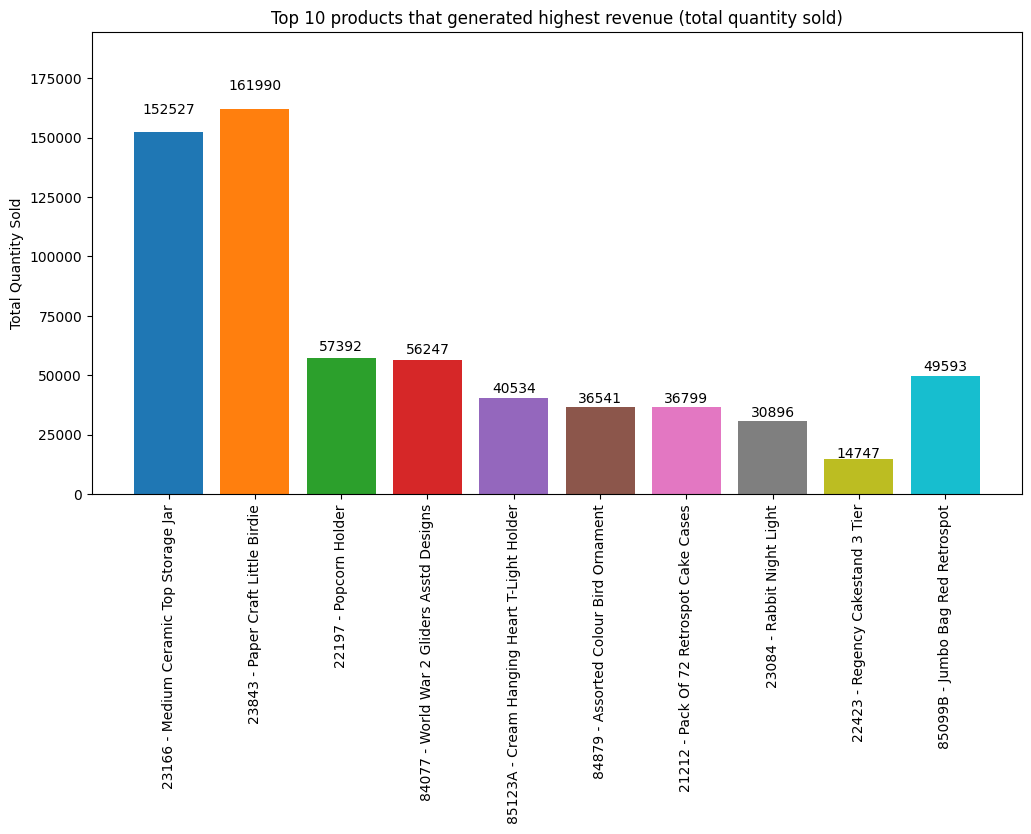

In [29]:
# Load the dataset
df = pd.read_csv('Cleaned_Sales_Transaction.csv')

#Create a new column
df['Revenue'] = df['Price'] * df['Quantity']

#Group by ProductNo and ProductName to get Sum of Revenue 
df_product = df.groupby(['ProductNo','ProductName'])[['Revenue','Quantity']].sum().reset_index()

#Sort by total revenue in descending order and get top 10 products 
top_10_products = df_product.nlargest(10, 'Revenue')

# extract productNo and ProductName
listProductNo = top_10_products['ProductNo'].tolist()
listProductName = top_10_products['ProductName'].tolist()
listTotalQuantity = top_10_products['Quantity'].tolist()

# Plot the bar chart
plt.figure(figsize=(12, 6))
for i in range(len(listProductNo)):
    labelx = listProductNo[i] + ' - ' + listProductName[i] #ProductNo - #ProductName
    plt.bar(labelx, listTotalQuantity[i]) #create bar
    plt.text(labelx, listTotalQuantity[i] *1.05, str(listTotalQuantity[i]), ha='center') #Add quantity above bar

plt.ylim(0, max(listTotalQuantity) * 1.2)  # Adjust y axis
plt.xticks(rotation=90) #Rotate x axis labels
plt.title('Top 10 products that generated highest revenue (total quantity sold)')
plt.ylabel('Total Quantity Sold')
plt.show()

In [ ]:
COUNTRIES THAT GIVE HIGHEST TOTAL MONEY

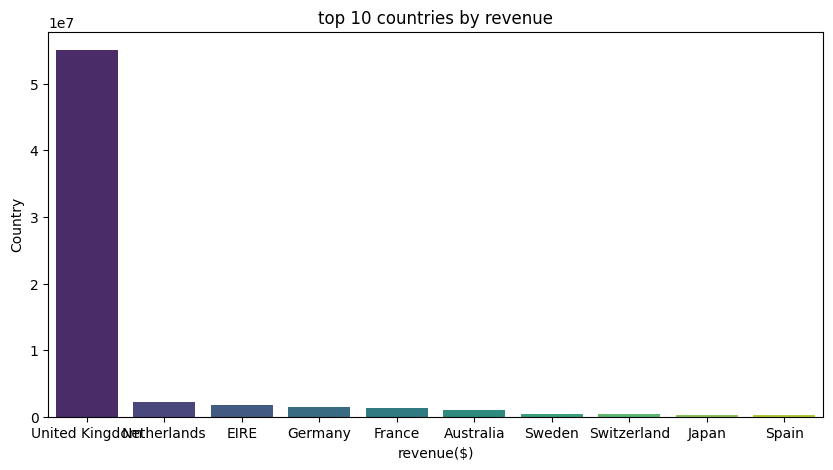

           Country      Revenue
36  United Kingdom  55055286.77
24     Netherlands   2155295.79
10            EIRE   1766176.83
14         Germany   1392821.14
13          France   1344424.80
0        Australia   1002459.47
32          Sweden    407717.17
33     Switzerland    365514.89
20           Japan    303017.41
31           Spain    296285.74


In [30]:
# group by 'country' and sum of revenue
top_10_countries = df.groupby('Country')['Revenue'].sum().reset_index()

#sort in descending order to get the top 10 countries
top_10_countries = top_10_countries.sort_values(by='Revenue', ascending=False).head(10)

# set figure size
plt.figure(figsize=(10, 5))

#plot bar chart
sns.barplot(y=top_10_countries['Revenue'], x=top_10_countries['Country'], hue=top_10_countries['Country'], palette="viridis", legend=False)

# add labels and title
plt.xlabel("revenue($)")
plt.ylabel("Country")
plt.title("top 10 countries by revenue")
plt.show()

print(top_10_countries[['Country', 'Revenue']])

In [ ]:
TOTAL MONEY EVERY MONTHS IN 2019

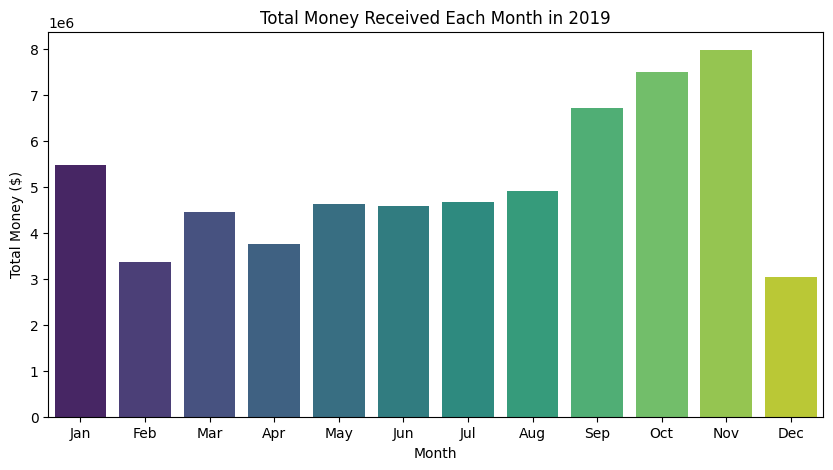

In [31]:
# load dataset correctly
df = pd.read_csv("Cleaned_Sales_Transaction.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

#  Create Month and Year columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# create column for sum of revenue
df['Revenue'] = df['Price'] * df['Quantity']

# Filter for 2019 data
df_2019 = df[df['Year'] == 2019]

# Group by month and sum revenue
monthly_revenue_2019 = df_2019.groupby('Month')['Revenue'].sum().reset_index()

#  Convert month numbers to names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_revenue_2019['Month_Name'] = monthly_revenue_2019['Month'].map(month_names)

#  Sort months in correct order
monthly_revenue_2019 = monthly_revenue_2019.sort_values(by='Month')

#  Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Month_Name", y="Revenue", data=monthly_revenue_2019, hue="Month_Name", palette="viridis", legend=False)

#  Add labels and title
plt.xlabel("Month")
plt.ylabel("Total Money ($)")
plt.title("Total Money Received Each Month in 2019")

# Show the plot
plt.show()

In [ ]:
COUNTRY THAT GIVES HIGHEST TOTTAL MONEY FROM EACH MONTH

In [42]:
# Ensure the 'Revenue' column exists
df['Revenue'] = df['Price'] * df['Quantity']

# Group by Year, Month, and Country, then sum the revenue
monthly_country_revenue = df.groupby(['Year', 'Month', 'Country'])['Revenue'].sum().reset_index()

# Find the country with the highest revenue per month
top_country_per_month = monthly_country_revenue.groupby(['Year', 'Month'])['Revenue'].idxmax()

# Display the rows with the highest revenue per month
top_country_revenue = monthly_country_revenue.loc[top_country_per_month]

# Print the results
print(top_country_revenue)


     Year  Month         Country     Revenue
21   2018     12  United Kingdom  3982591.49
43   2019      1  United Kingdom  4576213.24
67   2019      2  United Kingdom  2749077.85
88   2019      3  United Kingdom  3616069.60
113  2019      4  United Kingdom  3373860.44
133  2019      5  United Kingdom  3783098.77
159  2019      6  United Kingdom  3659369.05
182  2019      7  United Kingdom  3907148.00
207  2019      8  United Kingdom  3884711.13
229  2019      9  United Kingdom  5641483.48
256  2019     10  United Kingdom  6092276.33
280  2019     11  United Kingdom  6939826.29
301  2019     12  United Kingdom  2849561.10


In [ ]:
TOTAL MONEY RECEIVED EACH MONTH FROM TOP 10 COUNTRIES IN 2019

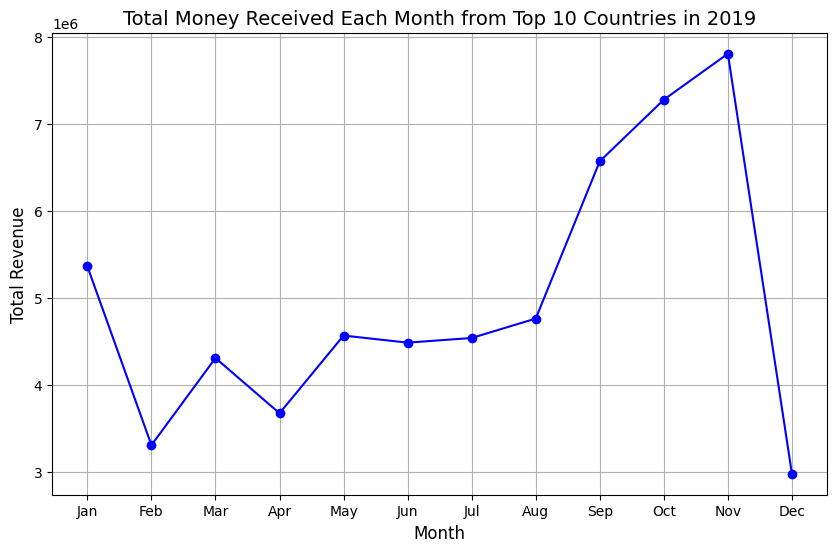

In [43]:
 #filter for 2019 data
df_2019 = monthly_country_revenue[monthly_country_revenue['Year'] ==2019]

# Group by country to calculate total revenue for each country in 2019
country_revenue_2019 = df_2019.groupby('Country')['Revenue'].sum()

# Get the top 10 countries with the highest revenue in 2019
top_10_countries = country_revenue_2019.nlargest(10).index

# filter data to include only top 10 countries 
top_10_data = df_2019[df_2019['Country'].isin(top_10_countries)]

# Group by year and month to get total revenue for the top 10 countries 
monthly_revenue_top_10 = top_10_data.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

# Step 6: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue_top_10['Month'], monthly_revenue_top_10['Revenue'], marker='o', color='b')

# Customize the plot
plt.title('Total Money Received Each Month from Top 10 Countries in 2019', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(monthly_revenue_top_10['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


In [ ]:
TOTAL MONEY RECEIVED EACH MONTH FROM TOP 10 PRODUCTS IN 2019

In [45]:
# Filter the data for 2019 and include relevant product columns
df_2019 = df[df['Year'] == 2019][['Year', 'Month', 'ProductName', 'ProductNo', 'Revenue']]

# Group by productName and productNo to calculate total revenue for each product in 2019
product_revenue_2019 = df_2019.groupby(['ProductName', 'ProductNo'])['Revenue'].sum().reset_index()

#Get the top 10 products with the highest revenue in 2019
top_10_products_2019 = product_revenue_2019.nlargest(10, 'Revenue')

# Display the top 10 products with their respective revenue
print(top_10_products_2019)


                             ProductName ProductNo     Revenue
1857      Medium Ceramic Top Storage Jar     23166  1725268.14
2168           Paper Craft Little Birdie     23843  1504077.15
2437                      Popcorn Holder     22197   560742.60
3609   World War 2 Gliders Asstd Designs     84077   527854.32
811   Cream Hanging Heart T-Light Holder    85123A   459803.66
203        Assorted Colour Bird Ornament     84879   393506.48
2122     Pack Of 72 Retrospot Cake Cases     21212   349392.97
2494                  Rabbit Night Light     23084   330265.57
1643             Jumbo Bag Red Retrospot    85099B   290685.30
2188                       Party Bunting     47566   286805.99


    Year  Month     Revenue
0   2019      1  1871383.58
1   2019      2   166178.75
2   2019      3   232874.42
3   2019      4   315123.40
4   2019      5   367547.36
5   2019      6   195810.77
6   2019      7   228427.91
7   2019      8   310426.25
8   2019      9   246775.53
9   2019     10   359083.81
10  2019     11   527468.41
11  2019     12  1607301.99


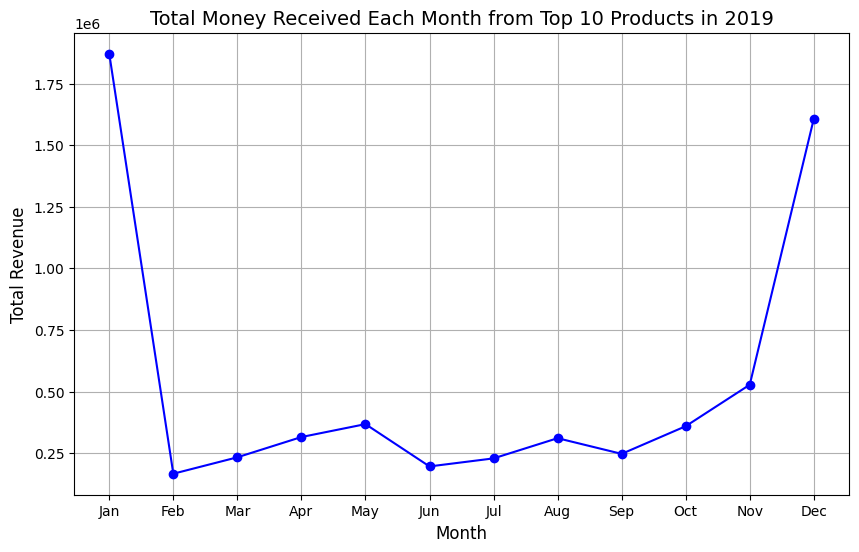

In [48]:
# Filter the data for 2019
df_2019 = df[df['Year'] == 2019][['Year', 'Month', 'ProductName', 'Revenue']]

# Group by productName to calculate total revenue for each product in 2019
product_revenue_2019 = df_2019.groupby('ProductName')['Revenue'].sum().reset_index()

# Get the top 10 products with the highest total revenue in 2019
top_10_products_2019 = product_revenue_2019.nlargest(10, 'Revenue')['ProductName']

# Filter the data to include only the top 10 products
top_10_product_data = df_2019[df_2019['ProductName'].isin(top_10_products_2019)]

# Group by Year, Month, and productName to calculate total revenue for each product by month
monthly_revenue_top_10_products = top_10_product_data.groupby(['Year', 'Month', 'ProductName'])['Revenue'].sum().reset_index()

# Aggregate the total revenue for all top 10 products per month
monthly_revenue_top_10_products_total = monthly_revenue_top_10_products.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

# Display the result
print(monthly_revenue_top_10_products_total)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue_top_10_products_total['Month'], monthly_revenue_top_10_products_total['Revenue'], marker='o', color='b')

# Customize the plot
plt.title('Total Money Received Each Month from Top 10 Products in 2019', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(monthly_revenue_top_10_products_total['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [ ]:
Total Money each Month that is Received from Top 10 Products that Give Highest Total Money in 2019

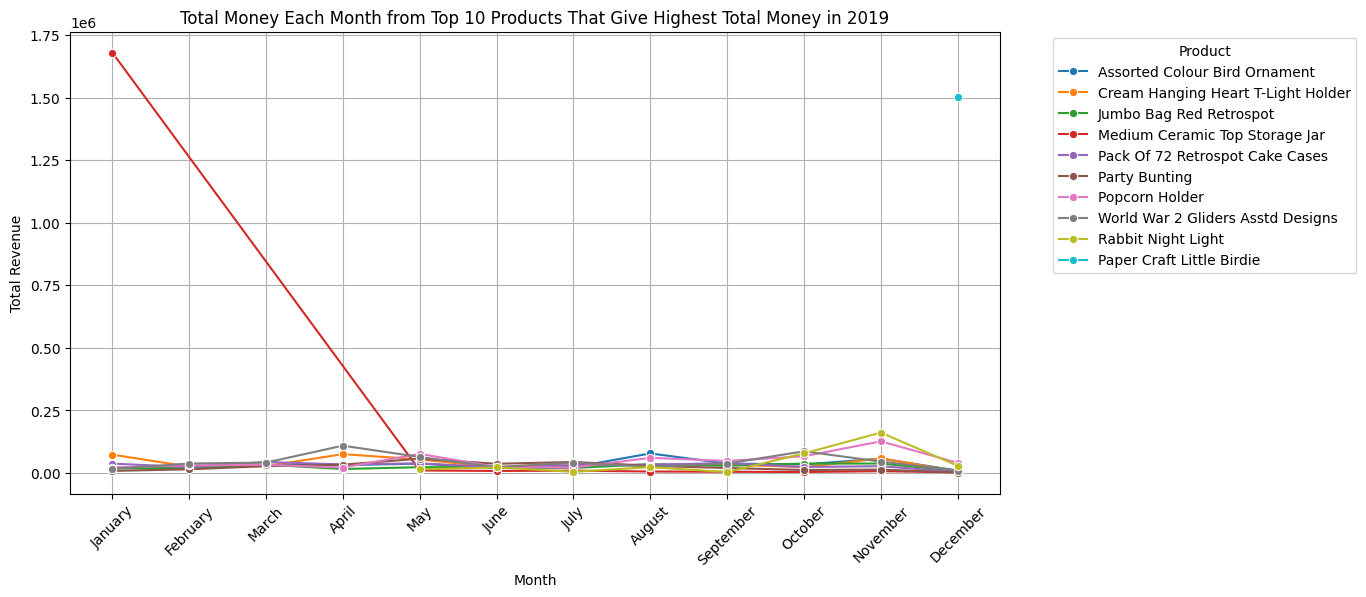

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Cleaned_Sales_Transaction.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

#Calculate Revenue = Price * Quantity
df['Sum_of_Revenue'] = df['Price'] * df['Quantity']

# Filter for 2019
df_2019 = df[df['Year'] == 2019]

# Group by ProductNo and sum revenue, then get the top 10 products
top_10_products = df_2019.groupby(['ProductNo', 'ProductName'])['Sum_of_Revenue'].sum().nlargest(10).reset_index()

# Filter original dataset to include only the top 10 products
df_top_10 = df_2019[df_2019['ProductNo'].isin(top_10_products['ProductNo'])]

# Group by Month and Product to get monthly revenue
monthly_revenue = df_top_10.groupby(['Month', 'ProductName'])['Sum_of_Revenue'].sum().reset_index()

# Convert month numbers to names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
monthly_revenue['Month'] = monthly_revenue['Month'].map(month_names)

# Sort by month order
monthly_revenue['Month'] = pd.Categorical(monthly_revenue['Month'], categories=month_names.values(), ordered=True)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x="Month", y="Sum_of_Revenue", hue="ProductName", marker="o")

# Chart styling
plt.title("Total Money Each Month from Top 10 Products That Give Highest Total Money in 2019")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)  # Rotate month names for better readability
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)

# Show plot
plt.show()





In [ ]:
Total Quantity each Month from Top 10 Products that Give Highest Total Money in 2019

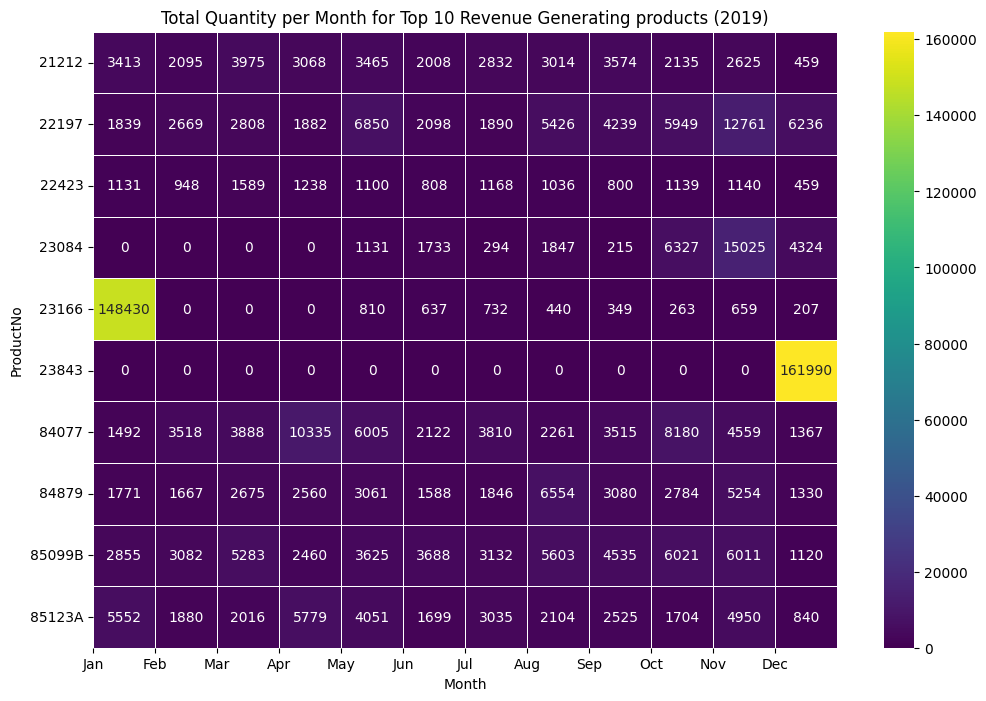

In [3]:
# Load the dataset
df = pd.read_csv("Cleaned_Sales_Transaction.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Calculate total revenue 
df['Revenue'] = df['Price'] * df['Quantity']

# Get top 10 revenue generating products 
top_10_products = df.groupby('ProductNo')['Revenue'].sum().nlargest(10).index

df_top_10 = df[df['ProductNo'].isin(top_10_products)]

df_2019 = df_top_10[df_top_10['Year'] == 2019]

# Pivot table for heatmap
total_quantity_per_month = df_2019.pivot_table(index='ProductNo', columns='Month', values='Quantity', aggfunc='sum', fill_value=0)

# plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(total_quantity_per_month, cmap='viridis', annot=True, fmt='.0f', linewidths=0.5)

plt.title('Total Quantity per Month for Top 10 Revenue Generating products (2019)')
plt.xlabel('Month')
plt.ylabel('ProductNo')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(rotation=0)
plt.show()

In [4]:
# Load dataset
df = pd.read_csv("Cleaned_Sales_Transaction.csv")

# Ensure Revenue column exists (Revenue = Price * Quantity)
df['Revenue'] = df['Price'] * df['Quantity']

# Check if "Year" column exists, otherwise extract from a date column
if 'Year' not in df.columns:
    possible_date_cols = [col for col in df.columns if 'date' in col.lower()]
    if possible_date_cols:
        date_col = possible_date_cols[0]
        df['Year'] = pd.to_datetime(df[date_col]).dt.year
    

# Filter Data for 2019
df_2019 = df[df['Year'] == 2019]

# Identify the Top 10 Revenue-Generating Products
top_10_products = df_2019.groupby(['ProductNo', 'ProductName'])['Revenue'].sum().nlargest(10).reset_index()

# Display the Table
print(top_10_products)

  ProductNo                         ProductName     Revenue
0     23166      Medium Ceramic Top Storage Jar  1725268.14
1     23843           Paper Craft Little Birdie  1504077.15
2     22197                      Popcorn Holder   560742.60
3     84077   World War 2 Gliders Asstd Designs   527854.32
4    85123A  Cream Hanging Heart T-Light Holder   459803.66
5     84879       Assorted Colour Bird Ornament   393506.48
6     21212     Pack Of 72 Retrospot Cake Cases   349392.97
7     23084                  Rabbit Night Light   330265.57
8    85099B             Jumbo Bag Red Retrospot   290685.30
9     47566                       Party Bunting   286805.99


In [ ]:
HOW WAS THE SALES TRENDS OVER THE MONTHS
ANSWER: Based on the figure 'Total money every month in 2019' this business had n increase in january but the sales reduced in febuary through march and became
relatively stable through may to june and there was a high increase during september and november and a rapid fall in december. This rapid fall happened 
because based on the total money each month that is received from top 10 country that give highest total money in 2019 shows that the sales to united kingdom 
on december 2019 was not as good as previous months.

In [ ]:
WHAT ARE THE MOST FREQUENTLY PURCHASED PRODUCTS
ANSWER: Based on the figure '10 products total quantity that give highest total money' the most frequently purchased and profitable products are the Medium
ceramic top storage jar, papper craft little birdie, popcorn holder, world war 2 gliders, cream hanging heart T light holder, assorted colored bird onament,
pack of 72 retrospect, rabbit night light, regency cake stand 3 tier, jumbo bag red reteospect. This means that this product give both profit and loss but still
many customers still buy those products.

In [ ]:
HOW MANY PRODUCTS DOES THE CUSTOMER PURCHASE IN EACH TRANSACTION 
ANSWER: Based on the figure '10 transactions that give highest total money' customer seem to buy diffrent amount of product based on their need but here
we can see the diffrence can be very significant.

In [ ]:
WHAT ARE THE MOST PROFITABLE SEGMENT CUSTOMERS
ANSWER:
The most profitable segment customers are customers that buy product include in figure '10 Products Price that Give Highest Total Money',
figure '10 Products Total Quantity that Give Highest Total Money' and figure '10 Products Total Quantity that Give Highest Total Money' and
customers that are from country that include in figure '10 Countries that Give Total Highest Money'

In [ ]:
BASED ON YOUR FINDINGS-WHAT STRATEGY COULD YOU RECOMMEND TO THE BUSINESS TO GAIN MORE PROFIT
ANSWER:
Based on my findings, there are several strategy to gain more profit. First, based on figure '10 Products Total Quantity that Give Highest Total Money',
there is a product that gives 0 value but still include in figure '10 Products that Give Highest Total Money', it means that this product need quality 
improvement so it can give more profit in the future. Second, Increase sales in countries included in figure '10 Countries that Give Total Highest Money'
with various marketing methods. Third, Increase sales in products included in figure '10 Products that Give Highest Total Money' with various marketing 
methods. Fourth, Improving the quality of products that are not included in figure '10 Products that Give Highest Total Money' to attract buyers. 
Last, Advertise products in countries that are not included in figure '10 Countries that Give Total Highest Money' to attract and increase the interest 
of buyers from these countries.